# $k$ Means Clustering

Our first clustering method sounds like $k$ nearest neighbors, but has nothing to do with it.

## What we will accomplish

In this notebook we will:
- Lay out the idea of the $k$ means clustering algorithm,
- Demonstrate it on some phony data and
- Discuss different ways you can choose the algorithm's $k$ parameter.

In [1]:
## For data handling
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a dark background
sns.set_style("whitegrid")

Suppose we have $n$ observations of $m$ features, $X$, that we suspect could be reasonably segmented into groups. The $k$ means algorithm gives us a way to attempt and find those groups in our data.

### The algorithm

In $k$ means clustering we:

1. Select $k$ initial points as a first guess for the $k$ groups' <i>centroids</i>, which are defined to be the average position of all the points within a group,
2. Group all $n$ points according to which centroid is closest,
3. Recalculate the $k$ centroids using the groups found in step 2 and
4. Repeat steps $2$ and $3$ until you reach a time at which no observations change groups.

#### By hand

Let's see this in action, then we will demonstrate how to implement it in `sklearn`.

In [2]:
np.random.seed(2)
X = np.zeros((30,2))

X[:10,:] = np.random.randn(10,2)
X[10:20,:] = np.random.randn(10,2) + np.array([4,4])
X[20:,:] = np.random.randn(10,2) + np.array([-5,5])

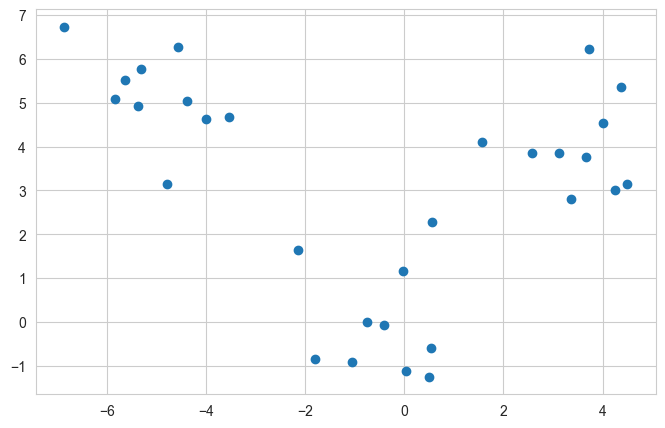

In [3]:
plt.figure(figsize=(8,5))

plt.scatter(X[:,0], X[:,1])

plt.show()

In [4]:
## random choice of centroid
centroid_guess = np.zeros((3,2))

centroid_guess[:,0] = 12*np.random.random(3) - 7
centroid_guess[:,1] = 8*np.random.random(3) - 1

## find distance from each point to each centroid
distances = np.zeros((30,3))

distances[:,0] = np.sqrt(np.sum(np.power(X - centroid_guess[0,:],2), axis=1))
distances[:,1] = np.sqrt(np.sum(np.power(X - centroid_guess[1,:],2), axis=1))
distances[:,2] = np.sqrt(np.sum(np.power(X - centroid_guess[2,:],2), axis=1))

clusters = np.argmin(distances, axis=1)

## recalculate cluster centroids
new_centroid_guess = np.zeros((3,2))
new_centroid_guess[0,:] = np.mean(X[clusters==0,:], axis=0)
new_centroid_guess[1,:] = np.mean(X[clusters==1,:], axis=0)
new_centroid_guess[2,:] = np.mean(X[clusters==2,:], axis=0)

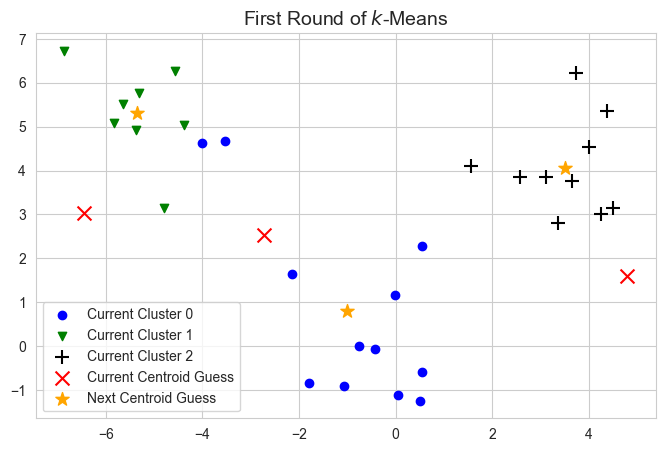

In [5]:
plt.figure(figsize=(8,5))

plt.scatter(X[clusters==0,0], X[clusters==0,1], c='b', label="Current Cluster 0")
plt.scatter(X[clusters==1,0], X[clusters==1,1], c='green', marker='v', label="Current Cluster 1")
plt.scatter(X[clusters==2,0], X[clusters==2,1], c='k', marker='+', s=100, label="Current Cluster 2")

plt.scatter(centroid_guess[:,0], 
            centroid_guess[:,1], 
            c='r', 
            marker='x', s=100, label='Current Centroid Guess')
plt.scatter(new_centroid_guess[:,0], new_centroid_guess[:,1], c='orange', marker='*', s=100, label='Next Centroid Guess')


plt.legend(fontsize=10)
plt.title("First Round of $k$-Means", fontsize=14)

plt.show()

In [6]:
centroid_guess = new_centroid_guess.copy()

## find distance from each point to each centroid
distances[:,0] = np.sqrt(np.sum(np.power(X - centroid_guess[0,:],2), axis=1))
distances[:,1] = np.sqrt(np.sum(np.power(X - centroid_guess[1,:],2), axis=1))
distances[:,2] = np.sqrt(np.sum(np.power(X - centroid_guess[2,:],2), axis=1))

clusters = np.argmin(distances, axis=1)

## recalculate cluster centroids
new_centroid_guess = np.zeros((3,2))
new_centroid_guess[0,:] = np.mean(X[clusters==0,:], axis=0)
new_centroid_guess[1,:] = np.mean(X[clusters==1,:], axis=0)
new_centroid_guess[2,:] = np.mean(X[clusters==2,:], axis=0)

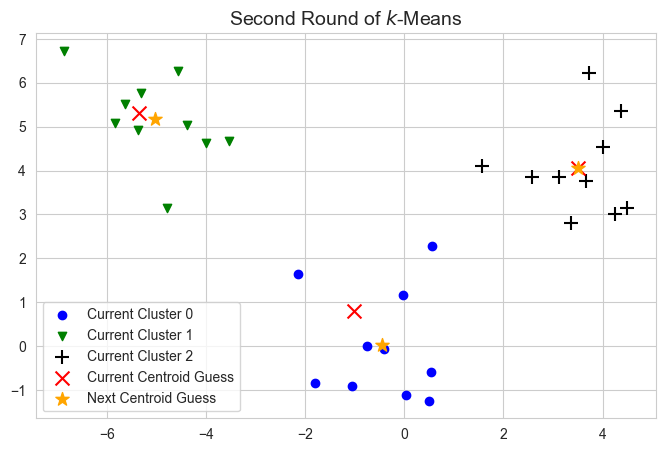

In [7]:
plt.figure(figsize=(8,5))

plt.scatter(X[clusters==0,0], X[clusters==0,1], c='b', label="Current Cluster 0")
plt.scatter(X[clusters==1,0], X[clusters==1,1], c='green', marker='v', label="Current Cluster 1")
plt.scatter(X[clusters==2,0], X[clusters==2,1], c='k', marker='+', s=100, label="Current Cluster 2")

plt.scatter(centroid_guess[:,0], centroid_guess[:,1], c='r', marker='x', s=100, label='Current Centroid Guess')
plt.scatter(new_centroid_guess[:,0], new_centroid_guess[:,1], c='orange', marker='*', s=100, label='Next Centroid Guess')


plt.legend(fontsize=10)
plt.title("Second Round of $k$-Means", fontsize=14)

plt.show()

We would keep going in this way until our stopping criterion was hit. For this example it seems like that could be this very round.

#### In `sklearn`

We can implement this in `sklearn` with `KMeans`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html</a>.

In [8]:
## import KMeans
from sklearn.cluster import KMeans

In [9]:
## Make a KMeans object
kmeans = KMeans(3,
                n_init='auto')

## Fit the kmeans object
kmeans.fit(X)


## get the clusters
clusters = kmeans.predict(X)

In [10]:
kmeans.cluster_centers_

array([[ 3.51492553,  4.06793613],
       [-5.02920859,  5.17747997],
       [-0.453641  ,  0.03501103]])

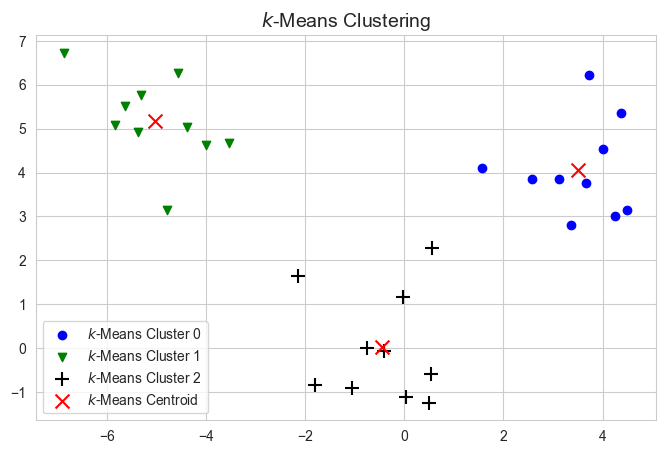

In [11]:
plt.figure(figsize=(8,5))

plt.scatter(X[clusters==0,0], X[clusters==0,1], c='b', label="$k$-Means Cluster 0")
plt.scatter(X[clusters==1,0], X[clusters==1,1], c='green', marker='v', label="$k$-Means Cluster 1")
plt.scatter(X[clusters==2,0], X[clusters==2,1], c='k', marker='+', s=100, label="$k$-Means Cluster 2")

## You can get the centers with cluster_centers_
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            c='r', marker='x', s=100, label='$k$-Means Centroid')


plt.legend(fontsize=10)
plt.title("$k$-Means Clustering", fontsize=14)

plt.show()

### How to choose $k$?

While we knew to choose $k=3$ for this problem, it is not clear, in general, what the best value of $k$ is. Typically you will have to run the algorithm multiple times with different values of $k$ and examine some metrics to determine which value of $k$ was "best".

We will now present two methods. First we will describe the method, then we will demonstrate it on a new data set.

In [12]:
X = np.loadtxt("../../../data/kmeans.csv", delimiter=",")

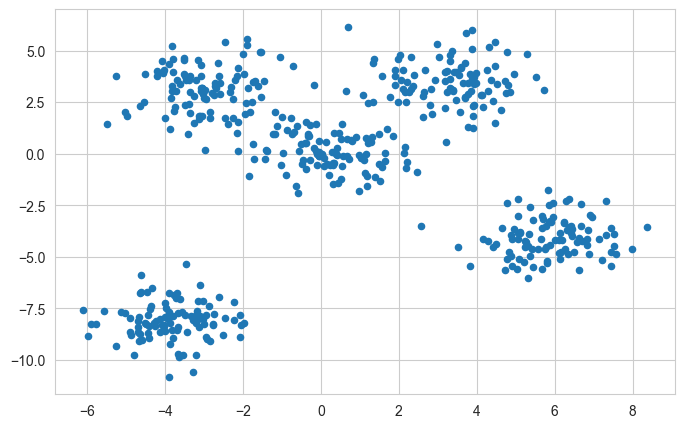

In [13]:
plt.figure(figsize=(8,5))

plt.scatter(X[:,0], X[:,1], s=20)

plt.show()

#### 1. The elbow method

The first approach we can take to determine a good value of $k$ is known as the <i>elbow method</i>. In the elbow method we calculate the <i>inertia</i> of the resulting clustering for each value of $k$ and then look for an <i>elbow</i> in the plot of inerita against $k$.

##### Inertia

For a given clustering with $k$ clusters we define the inertia to be:

$$
\sum_{i=1}^n \text{dist}(X^{(i)}, c^{(i)})^2,
$$

where $X^{(i)}$ is the $i^\text{th}$ observation in the data set, $c^{(i)}$ is the centroid of the cluster to which observation $i$ is assigned and $\text{dist}(a,b)$ denotes the distance between points $a$ and $b$.

We think of a clustering with low inertia as being good, with the caveat that we cannot just choose the value of $k$ that gives the lowest inertia. We could arbitrarily get an inertia of $0$ by settng $k=n$.

The elbow method plots inertia against $k$ and looks for an "elbow" in the plot, which is indicative of diminishing returns from increasing $k$.

In [14]:
## a loop to record inertias
inertias = []

for k in range(1,11):
    kmeans = KMeans(k,
                    n_init='auto')
    kmeans.fit(X)
    
    ## you can get the inertia from a fit KMeans object
    ## with .inertia_
    inertias.append(kmeans.inertia_)

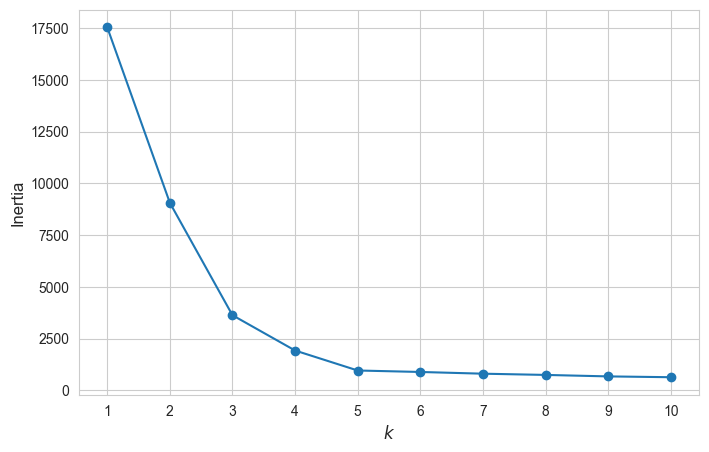

In [15]:
plt.figure(figsize=(8,5))

plt.plot(range(1,11), inertias, '-o')

plt.xlabel("$k$", fontsize=12)
plt.ylabel("Inertia", fontsize=12)

plt.xticks(range(1,11),fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In this example we could reasonably say that the "elbow" occurs at $4$ or $5$.

#### 2. The silhouette method

A second method for determining a good number of clusters is known as the <i>silhouette method</i> which involves calculating the <i>silhouette score</i> for a given clustering.

#### Silhouette score

For a given observation $i$ the silhouette score for $i$ is defined to be:

$$
\frac{b-a}{\max(a,b)},
$$

where $a$ is the average distance of observation $i$ to all other points in its assigned cluster, and $b$ is the average distance of observation $i$ to all the observations in the next closest cluster to observation $i$.

For a given clustering, we would take the average silhouette score over all $n$ observations.

In `sklearn` this can be found with `silhouette_score`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html">https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html</a>, for the cluster score and `silhouette_samples` for the individual observations <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html">https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html</a>.

For this metric a higher score is some indication of a "good" clustering.

In [16]:
## import from metrics
from sklearn.metrics import silhouette_score, silhouette_samples

In [17]:
## Get a sample clustering
kmeans = KMeans(4, n_init='auto').fit(X)
clusters = kmeans.predict(X)

In [18]:
## show cluster wide score
## call silhouette_score with the features first
## then the clusters second
silhouette_score(X, clusters)

0.5983419992558888

In [19]:
## show individual scores with silhouette_samples
silhouette_samples(X, clusters)

array([0.27857311, 0.22145543, 0.45163137, 0.08146011, 0.02621349,
       0.34150297, 0.24212355, 0.27309563, 0.34332117, 0.12686814,
       0.3086578 , 0.25806763, 0.54046723, 0.4760717 , 0.14192965,
       0.02516832, 0.0145969 , 0.19189277, 0.30603187, 0.34482743,
       0.45840766, 0.1812495 , 0.01638856, 0.43124556, 0.06898211,
       0.31570745, 0.13617661, 0.18334329, 0.48187928, 0.24636684,
       0.27165249, 0.03203594, 0.27636945, 0.2784685 , 0.180809  ,
       0.06339501, 0.29519994, 0.03344703, 0.37901262, 0.51919504,
       0.36059685, 0.42407241, 0.00386704, 0.27293743, 0.27004207,
       0.31004863, 0.04652942, 0.49182051, 0.42710382, 0.16109816,
       0.27569585, 0.3441773 , 0.47486558, 0.14654188, 0.00296295,
       0.44195705, 0.13933513, 0.12441605, 0.23848273, 0.16468396,
       0.06180201, 0.19374707, 0.34164368, 0.31201041, 0.48184719,
       0.35617104, 0.15718886, 0.21008727, 0.15731525, 0.32875381,
       0.40188037, 0.41161954, 0.22703173, 0.104734  , 0.08068

In [20]:
## a loop to record inertias
sils = []

for k in range(2,11):
    kmeans = KMeans(k, n_init='auto').fit(X)
    
    ## you can get the inertia from a fit KMeans object
    ## with .inertia_
    sils.append(silhouette_score(X, kmeans.predict(X)))

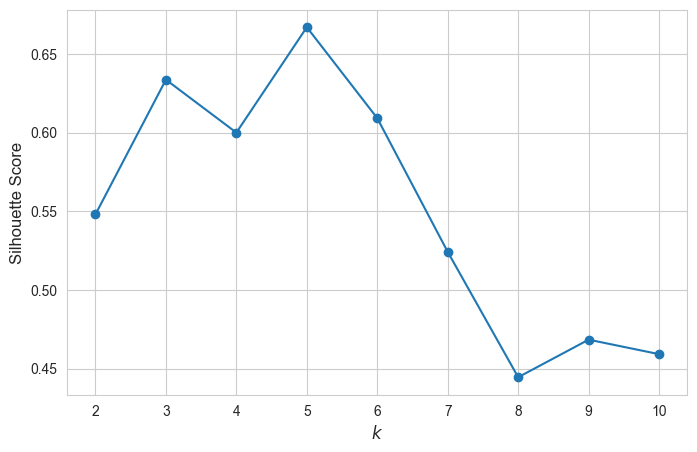

In [21]:
plt.figure(figsize=(8,5))

plt.plot(range(2,11), sils, '-o')

plt.xlabel("$k$", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)

plt.xticks(range(2,11),fontsize=10)
plt.yticks(fontsize=10)

plt.show()

It can be helpful when selecting $k$ to look at what is known as the <i>silhouette diagram</i>, which plots the distribution of silhouette scores for each cluster along with the sample average score. Our goal with such plots is to avoid clusters with distributions completely to the left of the average score line (red dotted line below).

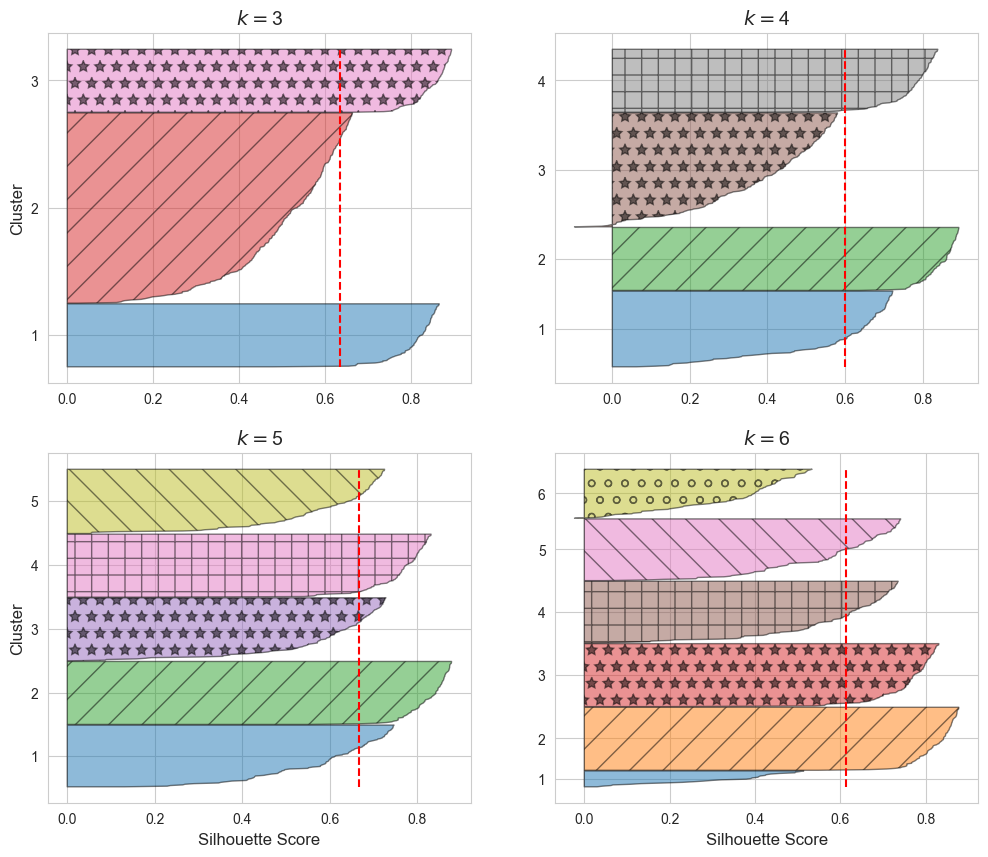

In [22]:
hatch_dict={0:'',
               1:'/',
               2:'*',
               3:'+',
               4:'\\',
               5:'o'}

fig,ax = plt.subplots(2, 2, figsize=(12,10))

i = 0
for k in [3,4,5,6]:
    kmeans = KMeans(k, n_init='auto').fit(X)
    clusters = kmeans.predict(X)
    
    y_lower = 0

    cluster_ticks = []
    
    for c in range(k):
        c_scores = silhouette_samples(X, clusters)[clusters==c]
        c_scores.sort()


        ax[i//2,i%2].fill_betweenx(
                            np.arange(y_lower, y_lower + np.sum(clusters==c)),
                            0,
                            c_scores,
                            facecolor= plt.cm.tab10(float(c) / k),
                            edgecolor='black',
                            hatch=hatch_dict[c],
                            alpha=0.5,
                        )
        cluster_ticks.append((y_lower + y_lower + np.sum(clusters==c))/2)
        y_lower = y_lower + np.sum(clusters==c)

    ax[i//2,i%2].plot([silhouette_score(X, clusters), silhouette_score(X, clusters)],[0,y_lower], 'r--')
    ax[i//2,i%2].set_title("$k=$"+str(k), fontsize=14)
    ax[i//2,i%2].set_yticks(cluster_ticks)
    ax[i//2,i%2].set_yticklabels(range(1,k+1), fontsize=10)
    ax[i//2,i%2].tick_params(axis='x',labelsize=10)
    i = i + 1

ax[0,0].set_ylabel("Cluster", fontsize=12)
ax[1,0].set_ylabel("Cluster", fontsize=12)
ax[1,0].set_xlabel("Silhouette Score", fontsize=12)
ax[1,1].set_xlabel("Silhouette Score", fontsize=12)



plt.show()

From the above plots we can see that $k=3$ and $k=5$ have all "good" clusters, but $k=3$'s $2^\text{nd}$ cluster has the vast majority of its points to the left of the average line.

Because $k=5$ was:
- a potential elbow case,
- has the highest silhouette score and
- has no "bad" clusters according to our silhouette diagram

we will choose $k=5$.

## Summary

$k$ means has been shown to be a fast and scalable clustering algorithm that is easy to implement. However, there are some limitations:
- Random initialization of centroids can lead to suboptimal solutions:
    - see the associated `Practice Problems` notebook for some comments on this,
- Choosing $k$ can be tricky:
    - The elbow method is a bit coarse and
    - The silhouette method can be computationally expensive,
- Can be ill-behaved when:
    - Clusters have varying sizes,
    - Clusters have different densities or nonspherical shapes and
    - Features are on different scales:
        - Always scale your data prior to fitting `KMeans`.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)